<a href="https://colab.research.google.com/github/yajuna/computer-assisted-calculus/blob/master/week6_volume_of_revolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook, we look at the volume of revolution.

A volume is generated, by rotating a curve around an axis. So the shapes usually have cross section of a disk, or annulus.

## In class portion- please submit the cells below before end of class.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# for 3D plotting
import mpl_toolkits.mplot3d.axes3d as axes3d

import datetime
now = datetime.datetime.now()

# print versions of softwares and time when run
import sys
print("Python 3 version is", sys.version)
print("Numpy version is", np.__version__)
import matplotlib
print("Matplotlib version is", matplotlib.__version__)
print("Code run at", now)

Python 3 version is 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Numpy version is 2.0.2
Matplotlib version is 3.10.0
Code run at 2025-11-04 00:11:42.765831


### We plot the volume of revolution generated by rotating the two curves around the given axis.

Functions are $y=x^2+1$, and $y=x+3$. We rotate around the $x$, then the $y$ axis.

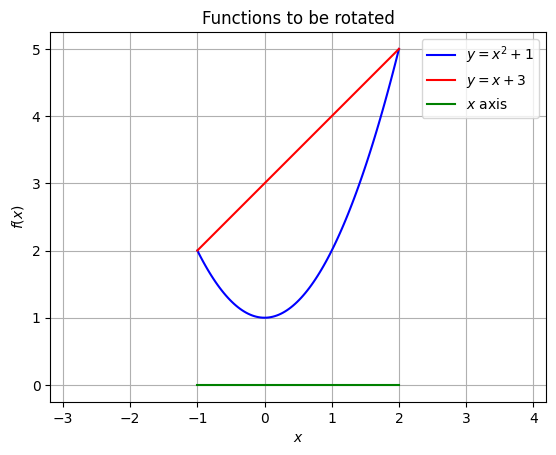

In [8]:
# first plot the curves

x = np.linspace(-1, 2, 100)

y1 = x ** 2 +1
y2 = x + 3

plt.figure()
plt.plot(x, y1, label=r'$y = x^2+1$', color='b')
plt.plot(x, y2, label=r'$y = x +3$', color='r')
plt.plot(x, np.zeros(x.shape),label=r'$x$ axis', color='g')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title(r'Functions to be rotated')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

Plot the rotated volume

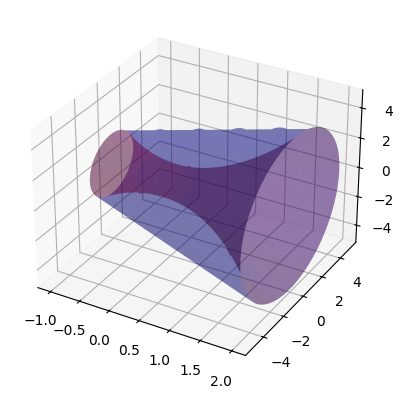

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

u = np.linspace(-1, 2, 60)
v = np.linspace(0, 2*np.pi, 60)
U, V = np.meshgrid(u, v)

X = U
Y1 = (U**2 + 1)*np.cos(V)
Z1 = (U**2 + 1)*np.sin(V)

Y2 = (U + 3)*np.cos(V)
Z2 = (U + 3)*np.sin(V)

ax.plot_surface(X, Y1, Z1, alpha=0.3, color='red', rstride=6, cstride=12)
ax.plot_surface(X, Y2, Z2, alpha=0.3, color='blue', rstride=6, cstride=12)
plt.show()

## The following is from [here](https://github.com/Gerald450/Solid-of-revolution-generator/tree/main).

Enter the 2D curve function in terms of x (e.g., sin(x), x**2): x**2
Enter the axis of revolution ('x' or 'y'): y
Enter the minimum value of x: 0
Enter the maximum value of x: 1
Volume of the solid of revolution: 0.6283185307179588


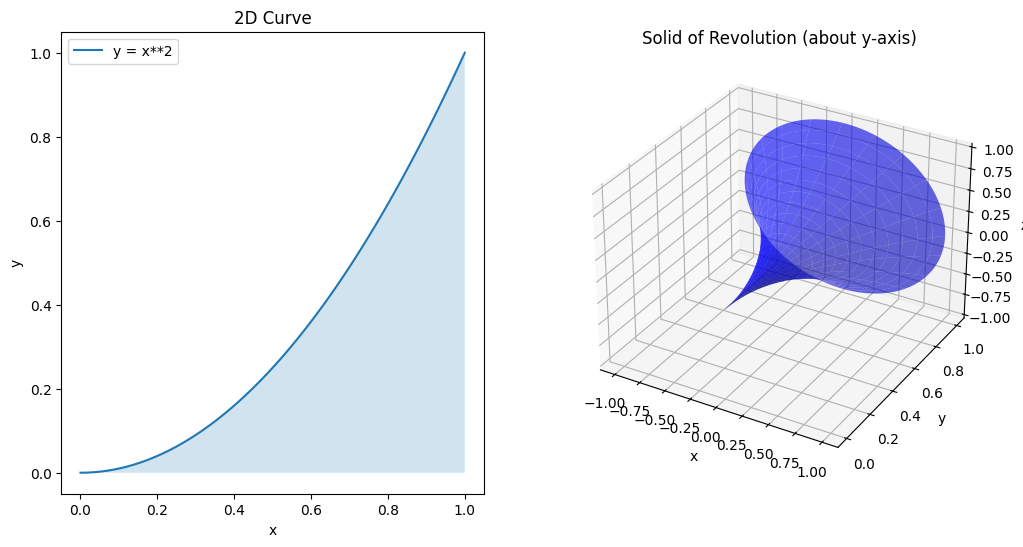

In [21]:
from scipy.integrate import quad
import sympy as sp

# Function to safely evaluate user input
def evaluate_function(expr, x):
    f = sp.lambdify(x, expr, 'numpy')
    return f

# Get user input for the 2D curve function
curve_input = input("Enter the 2D curve function in terms of x (e.g., sin(x), x**2): ")
x = sp.symbols('x')
curve_expr = sp.sympify(curve_input)
curve_function = evaluate_function(curve_expr, x)

# Get user input for the axis of revolution
axis_of_revolution = input("Enter the axis of revolution ('x' or 'y'): ").strip().lower()

# Get user input for the range of x
x_min = float(input("Enter the minimum value of x: "))
x_max = float(input("Enter the maximum value of x: "))

# Calculate the volume of the solid of revolution
def integrand(x):
    return np.pi * (curve_function(x))**2

volume, _ = quad(integrand, x_min, x_max)
print(f"Volume of the solid of revolution: {volume}")

# Plot the 2D curve and the solid of revolution
x_vals = np.linspace(x_min, x_max, 100)
y_vals = curve_function(x_vals)

fig = plt.figure(figsize=(12, 6))

# Plot the 2D curve
ax1 = fig.add_subplot(121)
ax1.plot(x_vals, y_vals, label=f'y = {curve_input}')
ax1.fill_between(x_vals, 0, y_vals, alpha=0.2)
ax1.set_title("2D Curve")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()

# Plot the solid of revolution
ax2 = fig.add_subplot(122, projection='3d')
theta = np.linspace(0, 2 * np.pi, 100)
X, Theta = np.meshgrid(x_vals, theta)

if axis_of_revolution == 'x':
    Y = curve_function(X)
    Z = Y * np.sin(Theta)
    Y = Y * np.cos(Theta)
    ax2.set_title("Solid of Revolution (about x-axis)")
else:  # Revolving about the y-axis
    Y = X
    X = curve_function(X)
    Z = X * np.sin(Theta)
    X = X * np.cos(Theta)
    ax2.set_title("Solid of Revolution (about y-axis)")

ax2.plot_surface(X, Y, Z, rstride=5, cstride=5, color='b', alpha=0.6)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")

plt.show()